### 일단 읽을수 있는 데이터는 다 읽어보자!

In [10]:
import pandas as pd
# file name 합치기
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 시각화
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage import io, feature
from skimage.transform import resize
import cv2
from PIL import ImageChops

import seaborn as sns

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 아이돌보미 현황부터 확인

In [2]:
import pandas as pd


면접평가 = pd.read_excel("데이터파일/1.여성가족부_아이돌보미 면접 평가 표준 항목_20210817.xlsx")
누적아동실적_서비스시간대별 = pd.read_excel("데이터파일/2.여성가족부_아이돌봄 누적아동실적현황-서비스시간대별 정보 서비스_20240612.xlsx")
누적아동실적_연력소득기준별 = pd.read_excel("데이터파일/3.여성가족부_아이돌봄 누적아동실적현황-연령소득기준별 정보 서비스_20240612.xlsx")
모니터링현황 = pd.read_excel("데이터파일/4.여성가족부_아이돌봄 모니터링현황 정보 서비스_20240612.xlsx")
서비스이용요금표 = pd.read_excel("데이터파일/5.여성가족부_아이돌봄 서비스이용요금표 정보 서비스_20240612.xlsx")
서비스제공기관 = pd.read_excel("데이터파일/6.여성가족부_아이돌봄 서비스제공기관 지정기준_20231031.xlsx")
월별가정실적현황 = pd.read_excel("데이터파일/7.여성가족부_아이돌봄 월별가정실적현황 정보 서비스_20240722.xlsx")

# 면접평가에 대한 데이터는 일을 구하는 사람에대한것이므로 서비스와 상관없을거같음..

In [6]:
면접평가

,기준년도,평가요소(배점),내용,평가등급,점수
0,2021,아동 인권 등 가치관(20점),"아동의 인권에 대한 감수성이 있는가-아동에 대한 인식, 아동의 인격 존중 여부, 아...",A,20
1,2021,아동 인권 등 가치관(20점),"아동의 인권에 대한 감수성이 있는가-아동에 대한 인식, 아동의 인격 존중 여부, 아...",B,16
2,2021,아동 인권 등 가치관(20점),"아동의 인권에 대한 감수성이 있는가-아동에 대한 인식, 아동의 인격 존중 여부, 아...",C,12
3,2021,아동 인권 등 가치관(20점),"아동의 인권에 대한 감수성이 있는가-아동에 대한 인식, 아동의 인격 존중 여부, 아...",D,8
4,2021,아동 인권 등 가치관(20점),"아동의 인권에 대한 감수성이 있는가-아동에 대한 인식, 아동의 인격 존중 여부, 아...",E,4
...,...,...,...,...,...
63,2021,적극성(15점),직업인으로 아이돌보미 활동에 임할 자세가 되어 있는가-소속 기관의 복무 및 업무 지...,D,6
64,2021,적극성(15점),직업인으로 아이돌보미 활동에 임할 자세가 되어 있는가-소속 기관의 복무 및 업무 지...,E,3
65,2021,적극성(15점),"돌봄 수요 있을 시 적극적으로 활동할 의사가 있는가-심야주말공휴일 활동 가능 여부,...",A,15
66,2021,적극성(15점),"돌봄 수요 있을 시 적극적으로 활동할 의사가 있는가-심야주말공휴일 활동 가능 여부,...",B,12


In [18]:
누적아동실적_서비스시간대별

,기준연월,아이돌봄기관번호,아이돌봄기관명,질병서비스여부,돌봄구분명,서비스다양화명,상위아이돌봄기관번호,상위아이돌봄기관명,총건수,시간0_2시작건수,...,시간6_8시작건수,시간8_10시작건수,시간10_12시작건수,시간12_14시작건수,시간14_16시작건수,시간16_18시작건수,시간18_20시작건수,시간20_22시작건수,시간22_24시작건수,데이터기준일자
0,202001,C0421,(사)순천YWCA,N,시간제,일반형,C0505,전라남도 광역거점,7139,8,...,1793,716,500,339,432,2523,607,136,83,20240612
1,202001,C0421,(사)순천YWCA,N,종일제,일반형,C0505,전라남도 광역거점,442,0,...,5,163,80,101,39,46,0,0,8,20240612
2,202001,C0421,(사)순천YWCA,Y,시간제,일반형,C0505,전라남도 광역거점,35,0,...,10,15,6,1,0,3,0,0,0,20240612
3,202001,C0383,강원 강릉시 강릉어린이집연합회,N,시간제,일반형,C0500,강원도 광역거점,3122,6,...,499,414,336,194,165,884,533,75,16,20240612
4,202001,C0383,강원 강릉시 강릉어린이집연합회,N,종일제,일반형,C0500,강원도 광역거점,541,0,...,22,252,144,41,12,59,5,6,0,20240612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37688,202404,C0451,칠곡군가족센터,N,종일제,일반형,C0506,경상북도 광역거점,442,0,...,1,115,168,100,0,57,1,0,0,20240612
37689,202404,C0451,칠곡군가족센터,Y,시간제,일반형,C0506,경상북도 광역거점,60,0,...,9,8,5,7,5,26,0,0,0,20240612
37690,202404,C0381,하남시 가족센터,N,시간제,일반형,C0498,경기도 아이돌봄광역지원센터,39400,0,...,8954,2611,2077,3224,4362,14087,3364,304,43,20240612
37691,202404,C0381,하남시 가족센터,N,종일제,일반형,C0498,경기도 아이돌봄광역지원센터,1415,0,...,128,297,232,298,377,63,20,0,0,20240612


### 누적아동실적 서비스시간대별 데이터는 어떤 시간에 어떤 유형의 서비스가 진행 되는지 빈도수를 확인할수 있을거라 생각하여 그래프를 그려볼예정

In [20]:
누적아동실적_서비스시간대별['기준연월'].unique()

array([202001, 202003, 202004, 202005, 202006, 202007, 202008, 202009,
       202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105,
       202106, 202107, 202108, 202109, 202110, 202111, 202112, 202201,
       202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209,
       202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305,
       202306, 202307, 202308, 202309, 202310, 202311, 202312, 202401,
       202402, 202403, 202404])

In [9]:
누적아동실적_서비스시간대별.columns

Index(['기준연월', '아이돌봄기관번호', '아이돌봄기관명', '질병서비스여부', '돌봄구분명', '서비스다양화명',
       '상위아이돌봄기관번호', '상위아이돌봄기관명', '총건수', '시간0_2시작건수', '시간2_4시작건수', '시간4_6시작건수',
       '시간6_8시작건수', '시간8_10시작건수', '시간10_12시작건수', '시간12_14시작건수', '시간14_16시작건수',
       '시간16_18시작건수', '시간18_20시작건수', '시간20_22시작건수', '시간22_24시작건수', '데이터기준일자'],
      dtype='object')

In [17]:
누적아동실적_서비스시간대별['데이터기준일자'].unique()

array([20240612])

In [13]:
누적아동실적_서비스시간대별['아이돌봄기관명'].unique()

array([' (사)순천YWCA', '강원 강릉시 강릉어린이집연합회', '강원 고성군 건강가정지원센터',
       '강원 동해시 건강가정.다문화가족지원센터', '강원 속초시 가족센터', '강원 양구군 가족센터',
       '강원 양양군가족센터', '강원 영월군가족센터', '강원 원주시 가족센터', '강원 인제군가족센터',
       '강원 정선군가족센터', '강원 철원군가족센터', '강원 춘천시 춘천동부디아코니아', '강원 태백시가족센터',
       '강원 평창군 가족센터', '강원 홍천군가족센터', '강원 화천군 지역자활센터', '강원 횡성군 가족센터',
       '경기 가평군 가족센터', '경기 고양시 건강가정지원센터', '경기 과천시 가족센터', '경기 광명시 가족센터',
       '경기 광주시가족센터', '경기 구리시 건강가정.다문화가족지원센터', '경기 군포시 가족센터',
       '경기 김포시 가족센터', '경기 남양주시 건강가정지원센터', '경기 동두천시 가족센터',
       '경기 부천시 건강가정지원센터', '경기 성남시 건강가정지원센터', '경기 수원시 건강가정지원센터',
       '경기 시흥시가족센터', '경기 안산시 건강가정지원센터', '경기 안성시 건강가정·다문화가족지원센터',
       '경기 안양시 가족센터', '경기 양주시 건강가정지원센터', '경기 양평군 가족센터',
       '경기 여주시 건강가정.다문화가족지원센터', '경기 연천군 가족센터', '경기 오산시 가족센터',
       '경기 용인시 건강가정,다문화가족지원센터', '경기 의정부시 가족센터', '경기 파주시 가족센터',
       '경기 평택시 가족센터', '경기 포천시 가족센터', '경기 화성시가족센터', '경남 거제시 여성인력개발센터',
       '경남 거창군가족센터', '경남 고성군 경남돌봄지원센터 사회적협동조합', '경남 남해군 남해여성회',
       '경남 산청군 가족센터', '경남 양산시 여성복지센터', '경남 

In [22]:
누적아동실적_서비스시간대별['총건수'].sum()

286739543

In [26]:
# 시간대별 시작 건수 컬럼만 선택하여 합산
time_columns = [col for col in 누적아동실적_서비스시간대별.columns if '시간' in col and '시작건수' in col]

# 각 시간대별 시작 건수의 전체 합계
total_sum = 누적아동실적_서비스시간대별[time_columns].sum().sum()

print("전체 시간대의 시작 건수 합계:", total_sum)

전체 시간대의 시작 건수 합계: 286739543


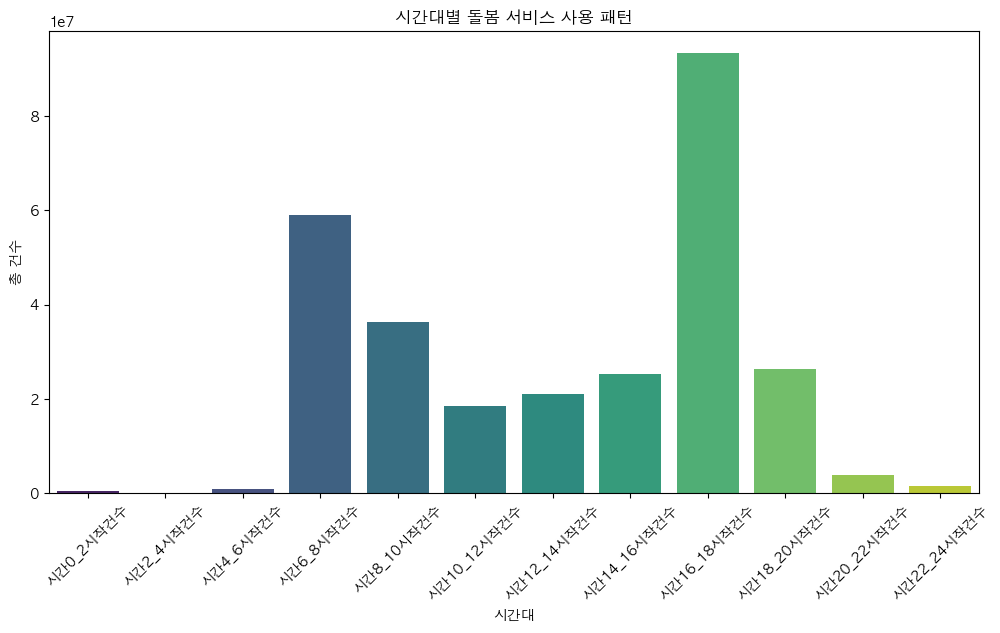

In [21]:
df = pd.DataFrame(누적아동실적_서비스시간대별)

# 시간대별 시작 건수 칼럼만 선택
time_columns = [col for col in df.columns if '시간' in col and '시작건수' in col]

# 시간대별 시작 건수 합산
time_data = df[time_columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=time_data.index, y=time_data.values, palette="viridis")

# 그래프 제목 및 레이블 추가
plt.title('시간대별 돌봄 서비스 사용 패턴')
plt.xlabel('시간대')
plt.ylabel('총 건수')

# x축 라벨 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

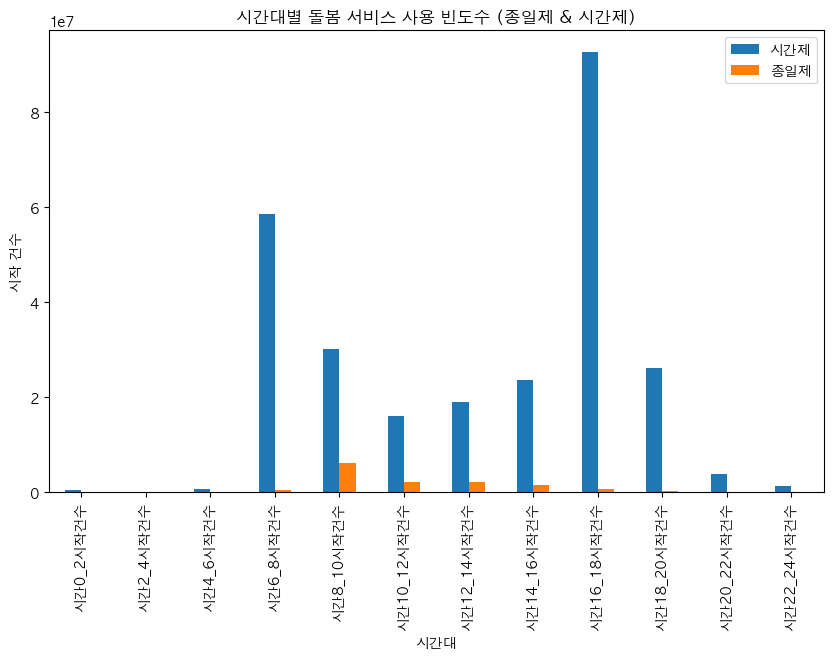

In [28]:
df = pd.DataFrame(누적아동실적_서비스시간대별)

# 1. 원핫 인코딩 수행
df_encoded = pd.get_dummies(df, columns=['돌봄구분명'])

# 2. 시간대별 빈도수 계산
# 시간대별 컬럼 선택
time_columns = [col for col in df.columns if '시간' in col and '시작건수' in col]

# 종일제와 시간제의 각 시간대별 합계 계산
time_by_dolbom_type = {
    '시간제': df_encoded[df_encoded['돌봄구분명_시간제'] == 1][time_columns].sum(),
    '종일제': df_encoded[df_encoded['돌봄구분명_종일제'] == 1][time_columns].sum()
}

# 데이터프레임으로 변환
time_by_dolbom_type_df = pd.DataFrame(time_by_dolbom_type)

# 3. 시각화
time_by_dolbom_type_df.plot(kind='bar', figsize=(10, 6))
plt.title('시간대별 돌봄 서비스 사용 빈도수 (종일제 & 시간제)')
plt.xlabel('시간대')
plt.ylabel('시작 건수')
plt.show()

In [30]:
df['상위아이돌봄기관명'].unique()

array(['전라남도 광역거점', '강원도 광역거점', '경기도 아이돌봄광역지원센터', '경상남도가족센터', '경상북도 광역거점',
       '전라북도 광역거점', '광주광역시 광역거점', '서울특별시 광역거점', '대구광역시 광역거점',
       '대전광역시 광역거점', '인천광역시 광역거점', '충청남도 광역거점', '부산광역시아이돌봄광역지원센터',
       '세종특별자치시 광역거점', '울산광역시 광역거점', '제주특별자치도 아이돌봄 광역지원센터', '충청북도 광역거점'],
      dtype=object)

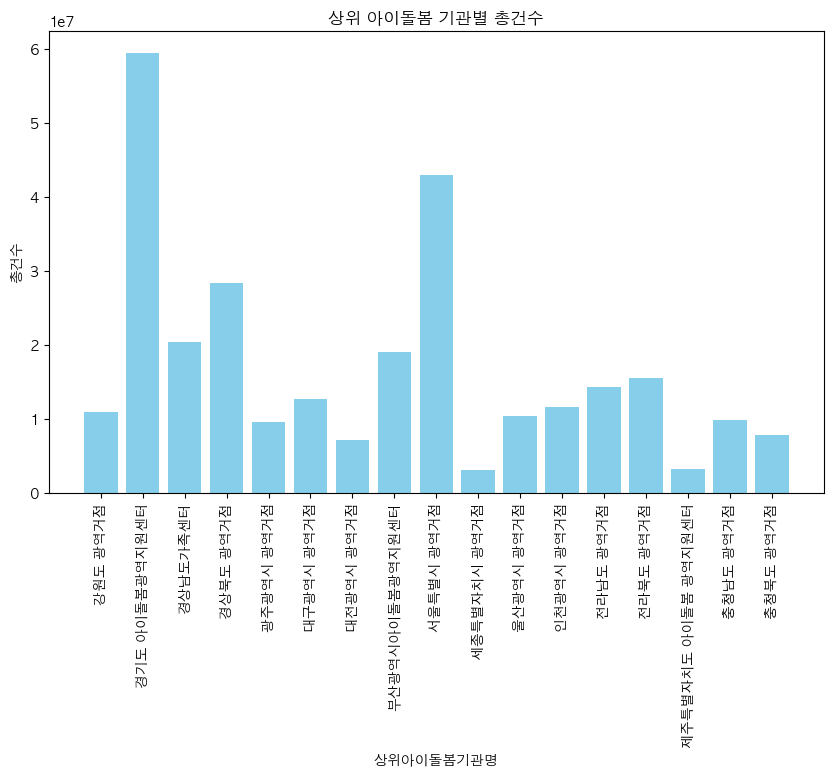

In [32]:
df = pd.DataFrame(누적아동실적_서비스시간대별)

# 1. 상위아이돌봄기관명 별 총건수 합계 계산
total_by_institute = df.groupby('상위아이돌봄기관명')['총건수'].sum().reset_index()

# 2. 시각화
plt.figure(figsize=(10, 6))
plt.bar(total_by_institute['상위아이돌봄기관명'], total_by_institute['총건수'], color='skyblue')
plt.title('상위 아이돌봄 기관별 총건수')
plt.xlabel('상위아이돌봄기관명')
plt.ylabel('총건수')
plt.xticks(rotation=90)
plt.show()

# 종일제 & 시간제
- 종일제는 3개월이상 만 36개월 이하 영아만 서비스하기 때문에 적은 빈도수를 확인할 수 있음.
- 시간제는 3개월이상 만 12세미만 아동이 대상으로 서비스하기 때문에 많은 빈도수를 확인할 수 있음. 


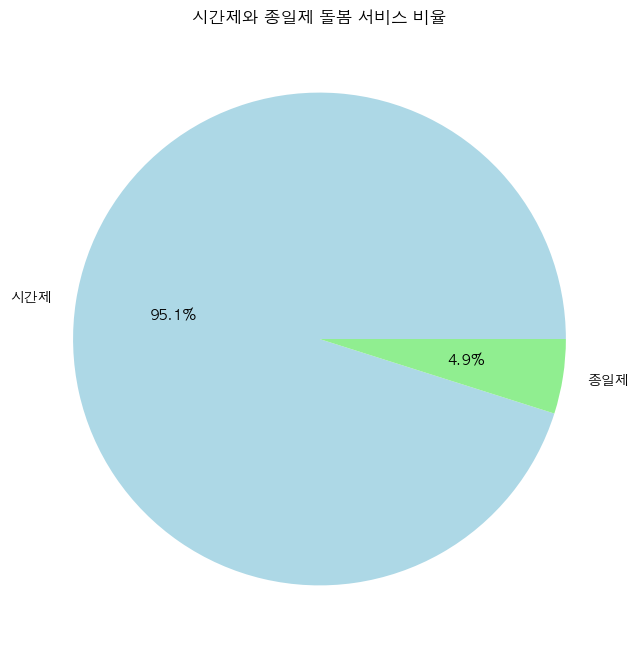

In [33]:

df = pd.DataFrame(누적아동실적_서비스시간대별)

# 1. 돌봄구분명 별 총건수 합계 계산
total_by_dolbom_type = df.groupby('돌봄구분명')['총건수'].sum().reset_index()

# 2. 시각화
plt.figure(figsize=(8, 8))
plt.pie(total_by_dolbom_type['총건수'], labels=total_by_dolbom_type['돌봄구분명'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('시간제와 종일제 돌봄 서비스 비율')
plt.show()